In [3]:
import pandas as pd
from tensorflow import keras as kr

In [6]:
df = pd.read_csv("bank.csv", sep = ";")
df.head(2)

age         job  marital  education default  balance housing loan  \
0   30  unemployed  married    primary      no     1787      no   no   
1   33    services  married  secondary      no     4789     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no

In [8]:
df["y"] = (df["y"] == "yes") + 0

In [12]:
df_dum = pd.get_dummies(df, drop_first = True)

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_dum, train_size = 0.8,
                                      random_state = 123)

from sklearn.preprocessing import StandardScaler
model_nor = StandardScaler().fit(df_train.drop("y", axis = 1))
df_train_nor = model_nor.transform(df_train.drop("y", axis = 1))
df_test_nor  = model_nor.transform(df_test.drop("y", axis = 1))

In [13]:
df_train_nor[:2, ]

array([[-1.05894698, -0.63569613,  1.46832263, -0.07663166,  1.05594476,
        -0.41262101, -0.32158469,  1.9597694 , -0.19844176, -0.15885185,
        -0.5227231 , -0.23154493, -0.20438861, -0.31690069, -0.14050108,
        -0.45225028, -0.1754616 , -0.08991524,  0.78790726, -0.60290899,
        -1.01785855, -0.64871037, -0.21446127, -0.1309921 ,  0.88142168,
         2.37892837, -0.27369841,  1.57915161, -0.40289853, -0.07073033,
        -0.23220711, -0.18606689, -0.42172285, -0.36104464, -0.10305561,
         1.4861084 , -0.31158848, -0.13529487, -0.11098662, -0.2123363 ,
        -0.17208357,  0.47558213],
       [ 1.39921354,  0.16320043,  0.37942709, -0.85528839,  2.03307424,
        -0.41262101, -0.32158469, -0.51026411, -0.19844176, -0.15885185,
        -0.5227231 ,  4.31881626, -0.20438861, -0.31690069, -0.14050108,
        -0.45225028, -0.1754616 , -0.08991524,  0.78790726, -0.60290899,
        -1.01785855, -0.64871037, -0.21446127, -0.1309921 , -1.13453075,
         2.37892

In [120]:
metric = "accuracy"
model = kr.Sequential([kr.layers.Dense(64, activation = "relu", 
                                       input_shape = [df_train_nor.shape[1]]),
                       kr.layers.Dense(32, activation = "relu"),
                       kr.layers.Dense(16, activation = "relu"),
                       kr.layers.Dense(1 , activation = "sigmoid")])
model.compile(loss = "binary_crossentropy",
              optimizer = kr.optimizers.RMSprop(learning_rate = 0.0001),
              metrics = [metric])

In [121]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                2752      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [122]:
history = model.fit(df_train_nor, df_train["y"], # batch_size = 200,
                    epochs = 40, validation_split = 0.2, verbose = 1)

Epoch 1/40
91/91 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.5463 - val_loss: 0.5891 - val_accuracy: 0.7776
Epoch 2/40
91/91 [==============================] - 0s 1ms/step - loss: 0.5335 - accuracy: 0.8427 - val_loss: 0.4827 - val_accuracy: 0.8854
Epoch 3/40
91/91 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.8804 - val_loss: 0.4244 - val_accuracy: 0.8881
Epoch 4/40
91/91 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8814 - val_loss: 0.3918 - val_accuracy: 0.8881
Epoch 5/40
91/91 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8817 - val_loss: 0.3699 - val_accuracy: 0.8881
Epoch 6/40
91/91 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8824 - val_loss: 0.3516 - val_accuracy: 0.8881
Epoch 7/40
91/91 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8828 - val_loss: 0.3354 - val_accuracy: 0.8923
Epoch 8/40
91/91 [==

In [123]:
df_hist = pd.DataFrame(history.history)
df_hist["epoch"] = history.epoch
df_hist.tail()

loss  accuracy  val_loss  val_accuracy  epoch
35  0.216647  0.906293  0.220422      0.912983     35
36  0.215602  0.906985  0.220148      0.912983     36
37  0.214151  0.908022  0.219883      0.911602     37
38  0.213000  0.908022  0.218952      0.914365     38
39  0.211559  0.908368  0.218884      0.914365     39

<AxesSubplot:xlabel='epoch'>

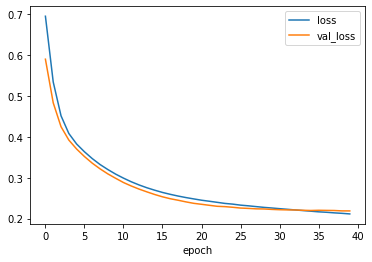

In [124]:
df_hist[["loss", "val_loss", "epoch"]].plot.line(x = "epoch")

In [125]:
pred = model.predict(df_test_nor)

29/29 [==============================] - 0s 1ms/step


In [126]:
pred[:6].round(2)

array([[0.2 ],
       [0.08],
       [0.11],
       [0.36],
       [0.  ],
       [0.06]], dtype=float32)

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
pred_class = (pred > 0.5) + 0
print(accuracy_score(y_true = df_test["y"],
                     y_pred = pred_class))
pd.crosstab(df_test["y"], pred_class[:, 0])

0.9082872928176795


col_0    0   1
y             
0      782  26
1       57  40

1) 90.28%, 40  
2) 91.82%, 40  
3) 91.27%, 35  
4) 91.38%, 38  
5) 91.82%, 41  

In [129]:
from sklearn.linear_model import LogisticRegression

In [132]:
model_lr = LogisticRegression(random_state=123).fit(X = df_train_nor,
                                                    y = df_train["y"])
pred = model_lr.predict_proba(df_test_nor)
pred_class = (pred[:, 1] > 0.5) + 0
pred_class[:5]

array([0, 0, 0, 0, 0])

In [133]:
print(accuracy_score(y_true = df_test["y"], y_pred = pred_class))
pd.crosstab(df_test["y"], pred_class)

0.9193370165745857


col_0    0   1
y             
0      791  17
1       56  41